Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

Load the dataset

In [4]:
data = pd.read_csv('employee-attrition.csv')

 Data Preprocessing

In [5]:
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])


Select features and target variable

In [6]:
X = data[['Age', 'Education', 'JobSatisfaction']] 
y = data['Attrition']

Split the dataset into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building using Logistic Regression and Decision Tree

Logistic Regression

In [8]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

Decision Tree

In [9]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

Calculate Performance Metrics

Logistic Regression

In [10]:
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

Decision Tree

In [12]:
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)


Print performance metrics

In [13]:
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", tree_accuracy)


Logistic Regression Accuracy: 0.8673469387755102
Decision Tree Accuracy: 0.7891156462585034


Print classification reports for both models

In [17]:
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_pred, zero_division=1))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, tree_pred, zero_division=1))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.93      0.50      0.46       294
weighted avg       0.88      0.87      0.81       294


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       255
           1       0.15      0.13      0.14        39

    accuracy                           0.79       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.77      0.79      0.78       294



visualize the decision tree

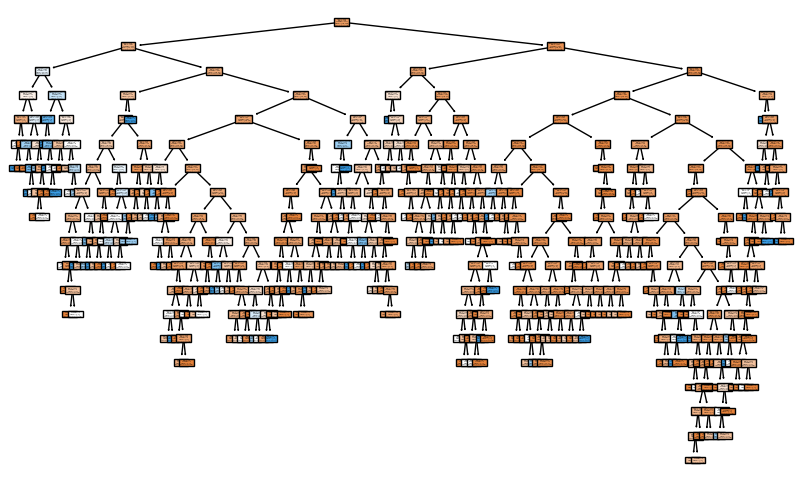

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["No Attrition", "Attrition"])
plt.show()